The main data frame is labelled 'df'.

Categorical data -> 'df_categorical_vars'.

Numeric data -> 'df_numeric_vars'.

'satisfaction_3' is a newly added column to separate 'neutral' and 'dissatisfied' customers.

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
df = pd.read_csv("Airline Passenger Satisfaction.csv").set_index('id').drop(columns=['Unnamed: 0'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0,satisfied,9
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0,satisfied,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,2,4,4,5,4,0,0,neutral or dissatisfied,5
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,5,5,5,5,4,0,0,satisfied,9
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,4,3,4,5,4,2,0,0,neutral or dissatisfied,5


As "satisfaction" does not differentiate between neutral and dissatisfied, we will create another column to make that distinction, using the given criteria of:

0-6: Dissatisfied
7-8: Neutral
9-10: Satisfied

In [4]:
df['satisfaction_3'] = df['satisfaction score'].apply(lambda x: 'satisfied' if x > 8 else 'neutral' if 6 < x <= 8 else 'dissatisfied')
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score,satisfaction_3
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18,neutral or dissatisfied,7,neutral
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6,neutral or dissatisfied,3,dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0,satisfied,9,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9,neutral or dissatisfied,6,dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0,satisfied,10,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,2,4,4,5,4,0,0,neutral or dissatisfied,5,dissatisfied
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,5,5,5,5,4,0,0,satisfied,9,satisfied
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,3,4,5,4,2,0,0,neutral or dissatisfied,5,dissatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 70172 to 34799
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             129880 non-null  object
 1   Customer Type                      129880 non-null  object
 2   Age                                129880 non-null  int64 
 3   Type of Travel                     129880 non-null  object
 4   Class                              129880 non-null  object
 5   Flight Distance                    129880 non-null  int64 
 6   Inflight wifi service              129880 non-null  int64 
 7   Departure/Arrival time convenient  129880 non-null  int64 
 8   Ease of Online booking             129880 non-null  int64 
 9   Gate location                      129880 non-null  int64 
 10  Food and drink                     129880 non-null  int64 
 11  Online boarding                    129880 non-null  in

Columns 7 to 20 are ordinal data from 0 to 5 each. Column 24 contains ordinal data from 0 to 10. 

In [6]:
df_categorical_vars = df.select_dtypes(include=['object', 'category'])

print("Categorical Variables:")
print(df_categorical_vars.columns.tolist())

print("\n")

for col in df_categorical_vars.columns.tolist():
    print(col)
    print(df_categorical_vars[col].unique())

df_categorical_vars['satisfaction score'] = df['satisfaction score']

df_categorical_vars

Categorical Variables:
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'satisfaction_3']


Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']
satisfaction_3
['neutral' 'dissatisfied' 'satisfied']


,Gender,Customer Type,Type of Travel,Class,satisfaction,satisfaction_3,satisfaction score
id,,,,,,,
70172,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,neutral,7
5047,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,3
110028,Female,Loyal Customer,Business travel,Business,satisfied,satisfied,9
24026,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,6
119299,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,10
...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,5
71167,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,9
37675,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,dissatisfied,5


In [7]:
df_numeric_vars = df.select_dtypes(include=['int64'])

print("Numeric Variables: \n")

for col in df_numeric_vars.columns.tolist():
    print(col)

df_numeric_vars

Numeric Variables: 

Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction score


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction score
id,,,,,,,,,,,,,,,,,,,
70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,7
5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,3
110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,9
24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,6
119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0,5
71167,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0,9
37675,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,5


# Checking for null values

In [8]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
satisfaction score                   0
satisfaction_3                       0
dtype: int64

Since there are no null values, we may carry on to the next step.

# EDA

EDA on Numeric and Categorical variables.

Numeric variables will be plotted on correlation. 

Categorical variables will be plotted on box plot.

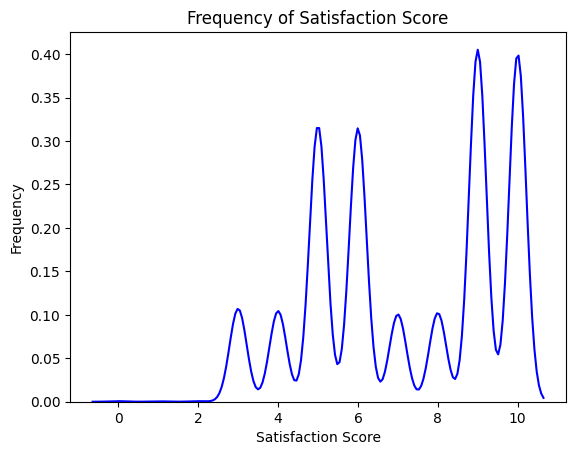

In [24]:
sns.kdeplot(df['satisfaction score'], color = 'blue')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Frequency of Satisfaction Score')

plt.show()

<Axes: >

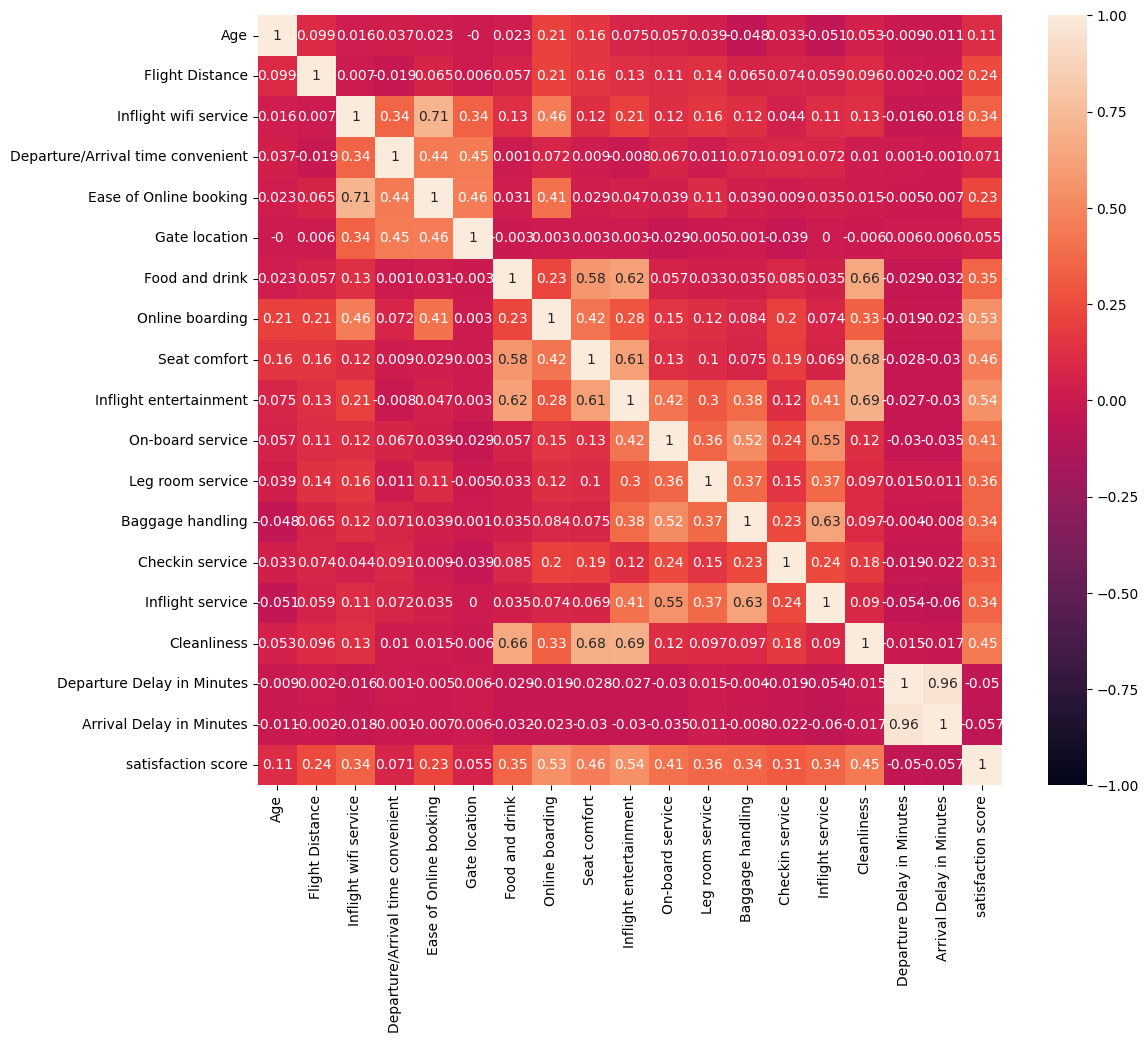

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric_vars.corr().round(3), vmin=-1, vmax=1, annot=True)

The variables with correlation coefficient > 0.3 include:

Inflight wifi service,
Food and drink,
Online boarding,
Seat comfort,
Inflight entertainment,
On-board service,
Leg room service,
Baggage handling,
Checkin service,
Inflight service,
Cleaniness.

The variables with some degree of collinearity include:

Cleaniness - Food and Drink.
Cleaniness - Seat comfort.
Cleaniness - Inflight entertainment.
Inflight service - On-board service.
Inflight service - Baggage handling.
Baggage handling - On-board service.
Inflight entertainment - Food and Drink.
Inflight entertainment - Seat comfort.
Ease of Online Booking - Inflight wifi service.

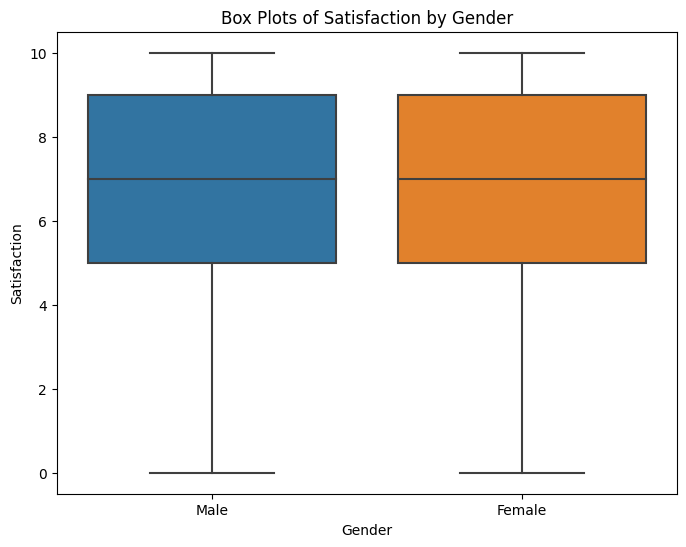

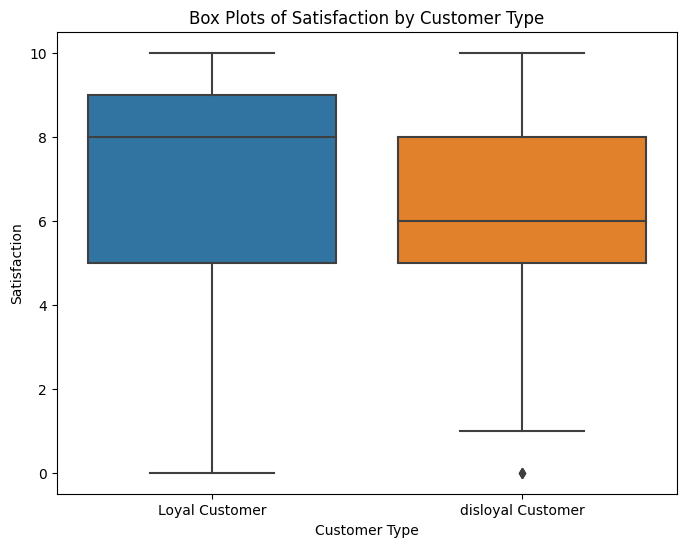

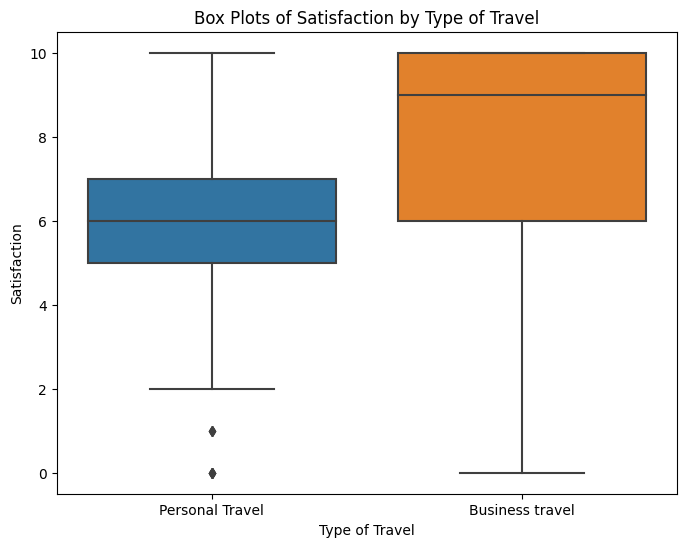

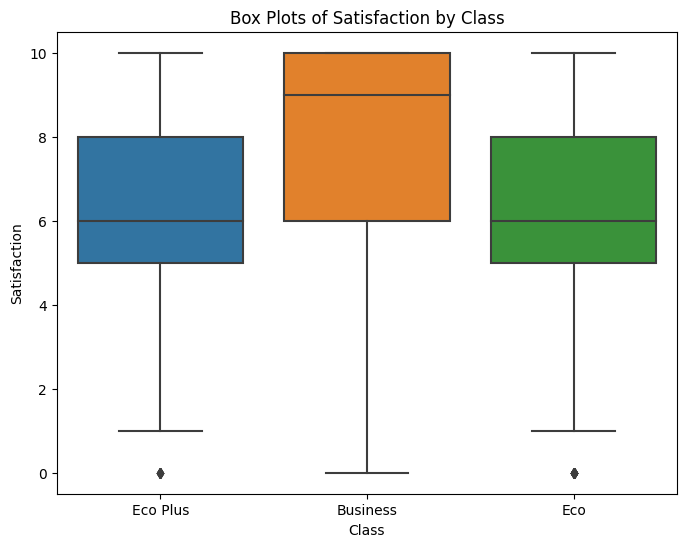

In [10]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Gender', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Gender')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Gender')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Customer Type', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Customer Type')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Customer Type')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Type of Travel', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Type of Travel')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Type of Travel')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Class', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Class')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Class')
plt.show()

In [11]:
for col in df_categorical_vars.columns.tolist():
    if col not in ['satisfaction', 'satisfaction_3', 'satisfaction score']:
        print(pd.crosstab(df_categorical_vars[col], df_categorical_vars['satisfaction_3']))
        print("\n")

satisfaction_3  dissatisfied  neutral  satisfied
Gender                                          
Female                 30382     7248      28269
Male                   28864     6958      28159


satisfaction_3     dissatisfied  neutral  satisfied
Customer Type                                      
Loyal Customer            44274    11098      50728
disloyal Customer         14972     3108       5700


satisfaction_3   dissatisfied  neutral  satisfied
Type of Travel                                   
Business travel         32685     4652      52356
Personal Travel         26561     9554       4072


satisfaction_3  dissatisfied  neutral  satisfied
Class                                           
Business               16001     2993      43166
Eco                    37515     9851      10943
Eco Plus                5730     1362       2319




The gender of the traveller tends to have little effect on the overall satisfaction level.

Customer type (loyalty) has some effect.

Type of travel has some effect on the satisfaction level.

Business class travellers tend to be more satisfied than Economy and Economy Plus travellers.